In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

In [2]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

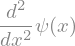

In [3]:
psi(x).diff(x, x)

In [4]:
-k**2 * psi(x)

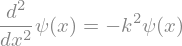

In [5]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [6]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [7]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [8]:
# sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
# sol

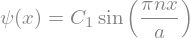

In [9]:
sol = sol.subs(k, n * sp.pi / a)
sol

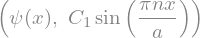

In [10]:
sol.lhs, sol.rhs

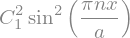

In [11]:
sol.rhs**2

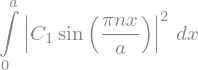

In [12]:
sp.integrate(sp.Abs(sol.rhs)**2, (x, 0, a))

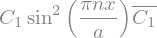

In [13]:
sol.rhs * sp.conjugate(sol.rhs)

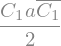

In [14]:
sp.integrate(sol.rhs * sp.conjugate(sol.rhs), (x, 0, a))

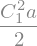

In [15]:
sp.integrate(sol.rhs**2, (x, 0, a))

In [16]:
sp.Symbol('C1')

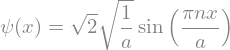

In [17]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

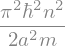

In [18]:
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E

In [19]:
fi = sp.exp(-sp.I * E * t / h)
fi

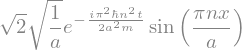

In [20]:
Psi = sol.rhs * fi
Psi

In [21]:
Psi.subs({m: 1, a: 1, h: 1})

In [22]:
sol.rhs * x * sol.rhs
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

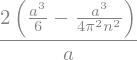

In [23]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a))

$$<p>=?$$
$$<p^2>=?$$

Czy zasada nieznaczoności faktycznie jest spełniona?


$$p= -i * ℏ * \frac{\partial}{\partial x}$$

$$p^2= - ℏ^2 * \frac{\partial^2}{\partial x^2}$$

In [24]:
# <p>
sp.integrate(sol.rhs * -sp.I * h * sol.rhs.diff(x), (x, 0, a))

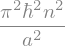

In [25]:
# <p^2>
sp.integrate(sol.rhs * (-1) * h**2 * sol.rhs.diff(x,x), (x, 0, a)).simplify()